Copyright 2019 Lewis Matthews License: Creative Commons Attribution 4.0 International https://creativecommons.org/licenses/by/4.0/

This workflow was written to be accompanied by a bootcamp. 

www.wtdsi.org

www.crownquest.com

In [1]:
# Import toolboxes needed for workflow
import pandas as pd

from pandas import set_option
set_option('display.max_columns',100)
set_option('display.max_rows',1000)

import numpy as np

import operator

import os
import re

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.metrics.scorer import SCORERS
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.plotting import figure
output_notebook()

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Loading BokehJS ...

In [2]:
# Import vertical wells.

VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [3]:
# Take a look at VertA

VertA.describe()

,Unnamed: 0,DEPT,DT35,GMSG,NPOR:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ROTARY_TORQUE,ANNULAR_VELOCITY,FLOW_DEVIATION,FLOW_IN_RATE,FLOW_OUT_PERCENT,STRKS_-_PUMP_1,STRKS_-_PUMP_2,TOP_DRIVE_RPM,TOP_DRIVE_TORQUE,TORQUE_DIFF,WC_BIT_BOUNCE_,WC_BIT_WEIGHT,WC_DRILL_STOP_POINT,WC_DRUM_ENGAGED,WC_FEED_FORWARD,WC_FREQ_CMD,WC_LOOP_IN_CONTROL_,WC_MOTOR_ENABLE,WC_ROP,WC_REAM_SPEED,WC_SENSITIVITY,WC_STATUS,WC_TARGET_BIT_WEIGHT,WC_TARGET_DIFF_PRESS,WC_TARGET_ROP,WC_TORQUE,WASHOUT_FACTOR
count,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.0,5649.0,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.0,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.00000,5649.000000,5649.000000,5649.0,5649.000000,5649.000000,5649.000000
mean,4282.780669,7078.225527,71.866779,89.908437,16.445192,2.525858,3.354579,7078.225527,51.060011,23.792246,0.0,0.0,139.083820,21.923703,544.694282,21.911843,345088.981590,234577.725084,57.490565,10724.530005,625.040025,0.649740,23.487077,3.276337,0.996999,60.0,15.944068,1.932087,97.956789,47.660790,59.471163,9.90216,0.003894,24.484156,50.0,56.374226,10724.532661,1.893566
std,1632.338829,1632.766580,10.991505,37.203267,7.939564,0.084223,0.647353,1632.766580,17.253549,4.288989,0.0,0.0,19.618891,4.912804,76.866997,4.917523,211657.645881,54513.987451,4.120197,1280.502713,705.603376,0.230748,4.321974,0.180323,0.041615,0.0,6.207070,0.145939,5.417568,16.727953,3.206616,11.64066,0.070302,2.916983,0.0,18.926525,1280.512352,0.661455
min,1456.000000,4251.000000,44.731456,8.345039,0.261295,1.768216,2.063820,4251.000000,10.000000,-1.400000,0.0,0.0,49.000000,8.000000,192.000000,8.000000,155.000000,137641.000000,8.900000,2511.000000,0.000000,0.500000,-1.900000,3.000000,0.060000,60.0,2.190000,1.000000,5.300000,-16.900000,40.000000,-20.00000,0.000000,10.000000,50.0,12.000000,2511.000000,0.676830
25%,2868.000000,5663.000000,64.040047,66.718525,10.704965,2.489617,2.909789,5663.000000,40.000000,22.900000,0.0,0.0,129.200000,18.000000,506.000000,18.000000,180632.000000,169584.000000,54.600000,10088.000000,258.100000,0.520000,22.600000,3.200000,1.000000,60.0,11.640000,1.940000,97.530000,36.500000,60.000000,5.00000,0.000000,24.000000,50.0,40.000000,10088.000000,1.573170
50%,4284.000000,7079.000000,71.416223,90.266879,16.330837,2.535355,3.208577,7079.000000,52.000000,24.800000,0.0,0.0,134.200000,22.000000,526.000000,22.000000,295757.000000,250320.000000,56.900000,10916.000000,373.900000,0.580000,24.500000,3.300000,1.000000,60.0,15.900000,2.000000,100.000000,48.200000,60.000000,10.00000,0.000000,25.000000,50.0,55.000000,10916.000000,1.702360
75%,5696.000000,8492.000000,81.412552,112.341225,22.976069,2.574170,3.690514,8492.000000,62.000000,25.600000,0.0,0.0,138.200000,26.000000,541.000000,26.000000,536094.000000,259037.000000,60.300000,11602.000000,605.800000,0.680000,25.300000,3.400000,1.000000,60.0,19.630000,2.000000,100.000000,58.400000,60.000000,15.00000,0.000000,26.000000,50.0,70.000000,11602.000000,1.862700
max,7108.000000,9904.000000,109.634691,555.784152,39.996130,2.811949,12.646755,9904.000000,148.000000,149.800000,0.0,0.0,203.600000,32.000000,799.000000,32.000000,781672.000000,338882.000000,69.500000,13560.000000,5960.600000,1.660000,148.100000,3.500000,1.000000,60.0,51.560000,2.000000,100.000000,152.300000,60.000000,39.20000,2.000000,33.000000,50.0,100.000000,13560.000000,4.662600


In [4]:
# Take a look at VertB

VertB.describe()

,Unnamed: 0,DEPT,DT35,GMGC,NPRL:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ROTARY_TORQUE,ANNULAR_VELOCITY,FLOW_DEVIATION,FLOW_IN_RATE,FLOW_OUT_PERCENT,STRKS_-_PUMP_1,STRKS_-_PUMP_2,TOP_DRIVE_RPM,TOP_DRIVE_TORQUE,TORQUE_DIFF,WC_BIT_BOUNCE_,WC_BIT_WEIGHT,WC_DRILL_STOP_POINT,WC_DRUM_ENGAGED,WC_FEED_FORWARD,WC_FREQ_CMD,WC_LOOP_IN_CONTROL_,WC_MOTOR_ENABLE,WC_ROP,WC_REAM_SPEED,WC_SENSITIVITY,WC_STATUS,WC_TARGET_BIT_WEIGHT,WC_TARGET_DIFF_PRESS,WC_TARGET_ROP,WC_TORQUE,WASHOUT_FACTOR
count,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.0,4919.000000,4919.0,4919.000000,4919.0,4.919000e+03,4.919000e+03,4919.0,4919.0,4919.0,4919.0,4919.000000,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.000000,4919.0,4919.0,4919.0,4919.0,4919.000000
mean,7007.966863,7107.966863,70.413061,86.222905,14.946949,2.552449,3.775980,7107.966863,89.998374,18.938483,61.505733,0.0,112.714129,0.0,463.122992,0.0,4.546292e+06,3.086484e+06,0.0,0.0,0.0,0.0,18.962025,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.009961,0.0,0.0,0.0,0.0,436.113781
std,1657.812838,1657.812838,11.392140,42.526465,8.130921,0.094738,0.678059,1657.812838,240.790338,8.777581,10.706697,0.0,28.113321,0.0,115.476225,0.0,2.332108e+04,1.634509e+05,0.0,0.0,0.0,0.0,8.991615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138627,0.0,0.0,0.0,0.0,17475.370546
min,4300.000000,4400.000000,45.867359,8.484020,0.303198,1.664607,2.199115,4400.000000,0.000000,-36.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.504951e+06,2.811650e+06,0.0,0.0,0.0,0.0,-36.400000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,5572.500000,5672.500000,62.127906,59.841883,9.046999,2.516786,3.302934,5672.500000,56.000000,16.200000,61.400000,0.0,99.400000,0.0,408.000000,0.0,4.531362e+06,2.948589e+06,0.0,0.0,0.0,0.0,16.200000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.957095
50%,6935.000000,7035.000000,69.651073,86.209660,14.537221,2.564923,3.628081,7035.000000,69.000000,21.700000,63.700000,0.0,101.100000,0.0,416.000000,0.0,4.539861e+06,3.081489e+06,0.0,0.0,0.0,0.0,21.600000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,1.079040
75%,8590.500000,8690.500000,80.048984,111.345240,21.804292,2.608634,4.235057,8690.500000,83.000000,23.700000,65.400000,0.0,102.800000,0.0,422.000000,0.0,4.545016e+06,3.240906e+06,0.0,0.0,0.0,0.0,23.700000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,1.209170
max,9923.000000,10023.000000,122.037341,563.306424,50.003808,2.793612,10.072201,10023.000000,3929.000000,190.700000,75.100000,0.0,193.900000,0.0,796.000000,0.0,4.645496e+06,3.430607e+06,0.0,0.0,0.0,0.0,202.400000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,2.000000,0.0,0.0,0.0,0.0,711424.312500


In [5]:
# Take a look at VertC

VertC.describe()

,Unnamed: 0,DEPT,DTCO,DTSM,GR,NPOR,RHOB,UCS,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ANNULAR_VELOCITY,FLOW_IN_RATE,STRKS_-_PUMP_1,STRKS_-_PUMP_2,WASHOUT_FACTOR
count,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.00000,6076.000000,6076.000000,6.076000e+03,6.076000e+03,6076.000000
mean,3063.159315,7093.159315,72.911489,128.208028,72.087459,0.152714,2.610384,11978.040926,7093.159315,75.889072,20.270359,50.55316,124.785352,481.736998,1.632717e+06,1.703770e+06,2.490615
std,1775.891416,1775.891416,11.529340,21.675027,35.388080,0.074213,0.073653,8600.884127,1775.891416,41.415528,4.673456,4.08210,25.329035,109.231515,3.768341e+04,2.249491e+05,1.562862
min,0.000000,4030.000000,45.081840,88.564430,8.780970,0.010620,2.243200,1624.181520,4030.000000,6.000000,-3.400000,4.80000,69.400000,263.000000,1.576067e+06,1.363242e+06,0.000000
25%,1518.750000,5548.750000,64.956902,111.532360,50.764785,0.099327,2.570295,5624.528810,5548.750000,45.000000,17.700000,48.30000,109.300000,415.000000,1.591521e+06,1.492792e+06,1.724803
50%,3059.500000,7089.500000,72.281585,123.835755,71.101945,0.154280,2.612285,9504.870115,7089.500000,74.000000,21.200000,50.80000,117.800000,446.000000,1.628704e+06,1.675327e+06,2.017215
75%,4606.250000,8636.250000,82.320828,145.130535,91.119902,0.211533,2.657503,14982.616695,8636.250000,99.000000,23.000000,53.30000,133.800000,510.000000,1.655980e+06,1.881255e+06,2.475502
max,6129.000000,10159.000000,109.663090,203.768110,508.172240,0.759270,2.889130,56756.863280,10159.000000,1029.000000,38.600000,65.50000,200.700000,811.000000,1.707412e+06,2.149326e+06,49.129030


In [6]:
# Take a look at VertD

VertD.describe()

,Unnamed: 0,DEPT,MCDT,GMGC,NPRL:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ANNULAR_VELOCITY,FLOW_IN_RATE,STRKS_-_PUMP_1,STRKS_-_PUMP_2,WASHOUT_FACTOR
count,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5.254000e+03,5254.000000,5254.000000
mean,6840.500000,6940.500000,65.135341,84.521167,16.664357,2.564313,3.438173,6940.500000,44.970308,17.509307,55.936962,41.290464,482.050628,9.135209e+05,711515.367720,1.553589
std,1516.843488,1516.843488,11.705022,31.500046,7.857871,0.087803,0.755141,1516.843488,75.830242,9.853668,5.296970,5.667677,66.186954,2.841152e+05,102039.650175,0.594222
min,4214.000000,4314.000000,45.612445,12.357642,0.409365,1.458790,1.373964,4314.000000,7.000000,-118.900000,9.600000,13.300000,155.000000,4.981930e+05,506616.000000,0.416940
25%,5527.250000,5627.250000,55.949722,61.844674,11.008969,2.531820,2.943581,5627.250000,29.000000,13.600000,53.100000,39.300000,459.000000,6.712172e+05,606654.250000,1.268265
50%,6840.500000,6940.500000,64.223610,85.291335,15.864088,2.573424,3.270634,6940.500000,35.000000,17.300000,56.200000,40.500000,473.000000,8.076820e+05,756014.000000,1.410900
75%,8153.750000,8253.750000,72.991135,108.550484,22.796876,2.613612,3.842844,8253.750000,49.000000,23.300000,60.000000,41.200000,481.000000,1.204567e+06,758157.000000,1.599988
max,9467.000000,9567.000000,170.604786,236.943681,67.538051,2.920184,13.189936,9567.000000,2778.000000,36.000000,68.100000,79.100000,923.000000,1.364687e+06,951955.000000,14.395510


In [7]:
# Take a look at VertE

VertE.describe()

,Unnamed: 0,DEPT,DT,GRTO,NPHI,RHOB,PE,ROP,WOB,RPM
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,6669.990924,7048.990924,70.668104,96.216126,0.138281,2.550181,3.489247,57.413676,25.403546,64.956049
std,1728.800941,1728.800941,11.636320,53.621146,0.079584,0.182814,0.815282,22.371223,3.041101,10.912189
min,3596.000000,3975.000000,46.303300,4.333600,-0.005000,1.120600,0.612400,7.010000,1.000000,0.000000
25%,5180.250000,5559.250000,61.879475,62.529625,0.075925,2.537725,3.014200,43.350000,24.500000,63.000000
50%,6673.500000,7052.500000,69.821250,95.889800,0.131850,2.589050,3.398200,56.470000,26.200000,65.000000
75%,8163.750000,8542.750000,79.905775,123.798625,0.195675,2.637300,3.968200,71.750000,26.900000,69.330000
max,9691.000000,10070.000000,125.620800,843.866000,0.625700,2.845600,11.727500,750.720000,40.800000,366.330000


In [8]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [9]:
# Standardize column names.
# RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA = VertA.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB = VertB.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC = VertC.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD = VertD.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE = VertE.rename(index=str,columns={"GRTO":"GR"})

<div class="alert alert-success">
    <b>EXERCISE 1</b>:
     <ul>
      <li>Insert new cells and plot gamma ray, porosity, and density for VertB
      <li>For Gamma Ray: GR 
      <li>For Porosity: NPHI
      <li>For Density: RHOB
      </li>
</div>

In [10]:
# Plot VertB DT35

x = VertB['DEPT']
y = VertB['DT']

p = figure(title='VertB DT', plot_width=800, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend_label='DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [11]:
# Plot VertB GR

x = VertB['DEPT']
y = VertB['GR']

p = figure(title='VertB GR', plot_width=800, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend_label='GR')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'API Units'
p.legend.location = 'top_left'
show(p)

In [12]:
# Plot VertB NPHI

x = VertB['DEPT']
y = VertB['NPHI']

p = figure(title='VertB NPHI', plot_width=800, plot_height=300)
r1 = p.line(x, y, color='blue', line_width=0.25,legend_label='NPHI')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Porosity Units'
p.legend.location = 'top_left'
show(p)

In [13]:
# Plot VertB RHOB

x = VertB['DEPT']
y = VertB['RHOB']

p = figure(title='VertB RHOB', plot_width=800, plot_height=300)
r1 = p.line(x, y, color='brown', line_width=0.25,legend_label='RHOB')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density Units'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 1 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 1 SOLUTION END </b>
</div>

In [14]:
# Plot VertC DTCO

x = VertC['DEPT']
y = VertC['DT']

p = figure(title='VertC DTCO', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend_label='DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 2</b>:
     <ul>
      <li>Insert new cells and plot gamma ray, porosity, and density for VertC
      <li>For Gamma Ray: GR
      <li>For Porosity: NPHI
      <li>For Density: RHOB
      </li>
      </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>EXERCISE 2 SOLUTION START </b>
</div>

In [15]:
# Plot VertC GR

x = VertC['DEPT']
y = VertC['GR']

p = figure(title='VertC GR', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend_label='Gamma Ray')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'API Unit'
p.legend.location = 'top_left'
show(p)

In [16]:
# Plot VertC NPHI

x = VertC['DEPT']
y = VertC['NPHI']

p = figure(title='VertC NPHI', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='blue', line_width=0.25,legend_label='Porosity')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Porosity'
p.legend.location = 'top_left'
show(p)

In [17]:
# Plot VertC RHOB

x = VertC['DEPT']
y = VertC['RHOB']

p = figure(title='VertC RHOB', plot_width=600, plot_height=300)
r1 = p.circle(x, y, color='brown', size=0.1,legend_label='Density')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 2 SOLUTION END </b>
</div>

Training and Testing Data

To evaluate our models we split our dataset into a training set and a test set. If you remember from the supervised learning example for apples and oranges we wanted to test how well our machine had learned to tell the difference by testing the machine with apples and oranges it hadn't previously seen.

For our example we are going to train a machine to predict a compressional wave sonic log using some drilling data and a gamma ray log. We will split VertB into a training and testing set and evaluate the performance of the model within the VertB dataset. We will then use this model to predict the compressional wave sonic log in VertC and evaluate our performance. The goal is a fair evaluation of the system.

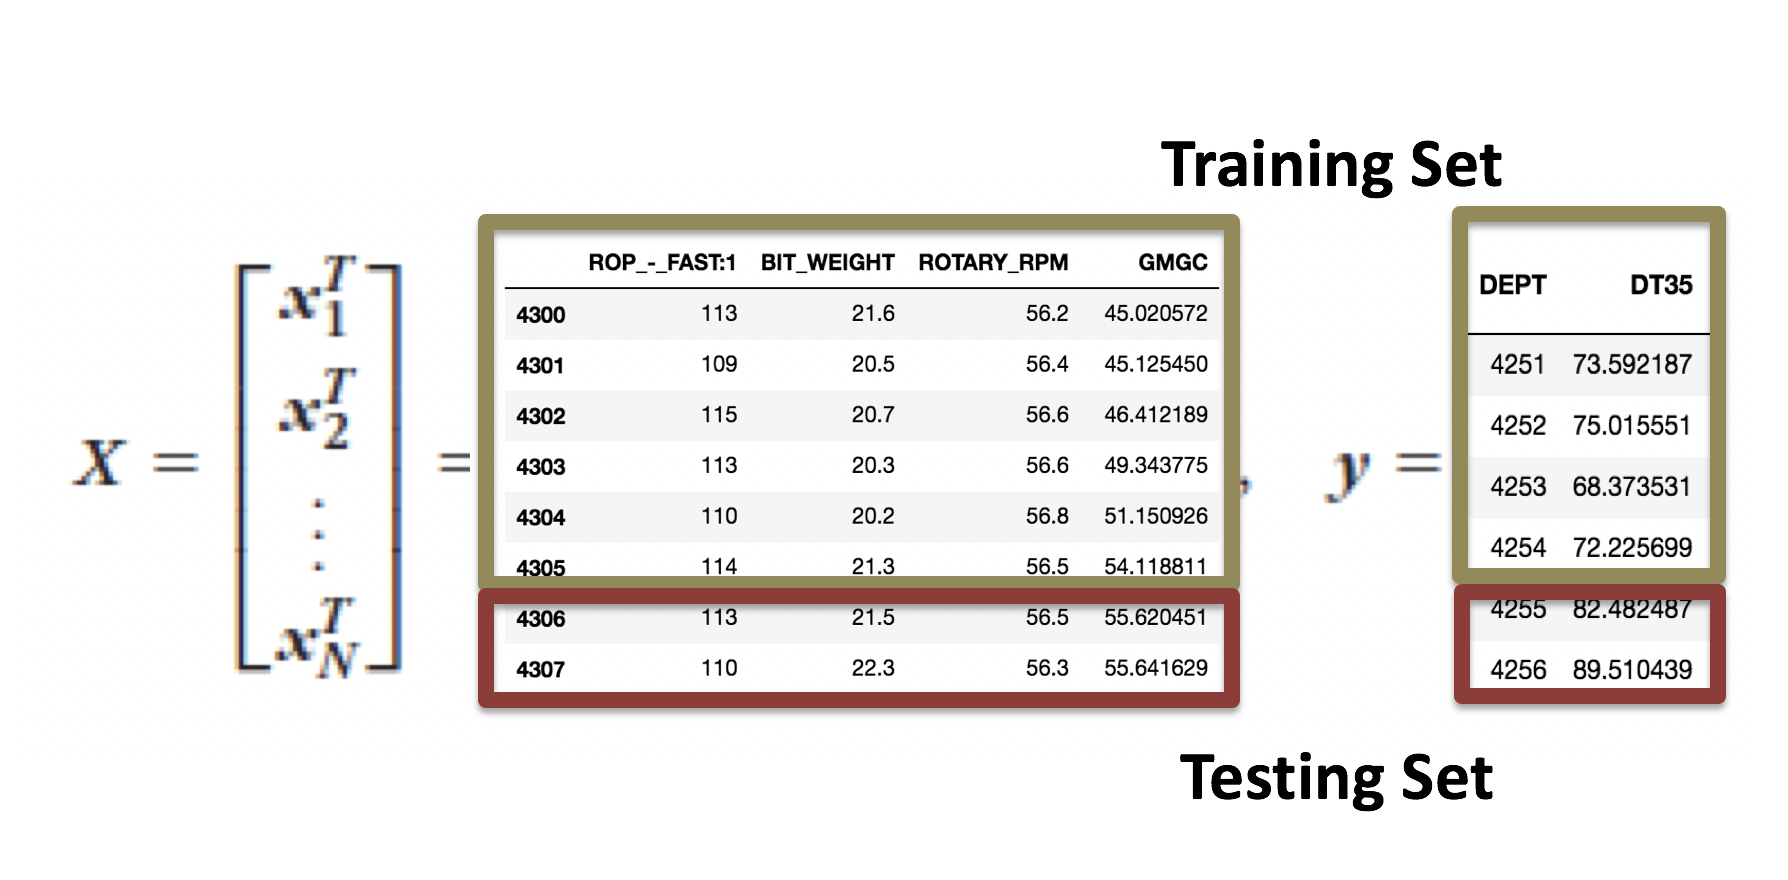

In [18]:
# Let's begin by setting up our VertB and VertC subset datasets.

X_VertB = VertB[['ROP','WOB','RPM','GR']]
y_VertB = VertB['DT']

X_VertC = VertC[['ROP', 'WOB','RPM', 'GR']]
y_VertC = VertC['DT']

In [19]:
# First we will use VertB to predict VertC and then VertC to predict VertB.
# We will now divide out data into a training and test sets using a rather handy function.
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(X_VertB, y_VertB, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(X_VertC, y_VertC, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

In [20]:
# We will use a neighbour based method for regression.

from sklearn.neighbors import KNeighborsRegressor

kneighbor_regression = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

kneighbor_regression.fit(train_X_VertB, train_y_VertB)
VertB_test = kneighbor_regression.predict(test_X_VertB)

In [21]:
# Take a look at test results on a crossplot

x = test_y_VertB
y = VertB_test

p = figure(title='VertB DT Crossplot', plot_width=300, plot_height=300)
r1 = p.circle(x, y, color='black', line_width=0.1,legend_label='DT')
p.xaxis.axis_label = 'VertB Actual'
p.yaxis.axis_label = 'VertB Prediction'
p.legend.location = 'bottom_right'
show(p)

In [22]:
# Now we take the model we just trained and use it to predict DT for VertC
VertC_Pred_DT_KNR = kneighbor_regression.predict(X_VertC)

In [23]:
# Plot results of VertC prediction

x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted DTCO using KNR', plot_width=800, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend_label='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [24]:
# Now train on VertC to predict VertB
kneighbor_regression.fit(train_X_VertC, train_y_VertC)

VertC_test = kneighbor_regression.predict(test_X_VertC)

In [25]:
# Take a look at test results on a crossplot

x = test_y_VertC
y = VertC_test

p = figure(title='VertC DT Crossplot', plot_width=300, plot_height=300)
r1 = p.circle(x, y, color='black', line_width=0.25,legend_label='DT')
p.xaxis.axis_label = 'VertC Actual'
p.yaxis.axis_label = 'VertC Prediction'
p.legend.location = 'bottom_right'
show(p)

In [26]:
VertB_Pred_DT_KNR = kneighbor_regression.predict(X_VertB)

In [27]:
x = VertB['DEPT']
y = VertB['DT']
z = VertB_Pred_DT_KNR

p = figure(title='VertB Predicted DT using KNR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.25,legend_label='DT')
r1 = p.line(x, z, color='blue', line_width=0.25,legend_label='Pred. DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [28]:
# We will now use mean absolute error to compare performance.
from sklearn.metrics import mean_absolute_error

error_VertB_model = mean_absolute_error(y_VertC, VertC_Pred_DT_KNR)
error_VertC_model = mean_absolute_error(y_VertB, VertB_Pred_DT_KNR)

In [29]:
# Lots of metrics are available.
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [30]:
y_VertC.mean()

72.91148947662937

In [31]:
error_VertB_model

8.119549065734036

In [32]:
y_VertB.mean()

70.41306066110997

In [33]:
error_VertC_model

7.0298434498881885

In [34]:
# Can we make this prediction better? Let's try a different regression method in sklearn.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1232, gamma=10)

In [35]:
svr

SVR(C=1232, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
# SVR works much faster when data is normalized.

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(VertB[['ROP','WOB','RPM','GR']])
normalized_VertB = scaler.transform(VertB[['ROP','WOB','RPM','GR']])

scaler = Normalizer().fit(VertC[['ROP','WOB','RPM','GR']])
normalized_VertC = scaler.transform(VertC[['ROP','WOB','RPM','GR']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['ROP','WOB','RPM','GR']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['ROP','WOB','RPM','GR']])

In [37]:
# Split the normalized data into training and test sets

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(normalized_VertB, y_VertB, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(normalized_VertC, y_VertC, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

In [38]:
# Fit VertB and predict VertC
VertBtoVertC_DT = svr.fit(train_X_VertB, train_y_VertB)
VertC_Pred_DT = VertBtoVertC_DT.predict(normalized_VertC)

In [39]:
x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted DT using SVR', plot_width=800, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend_label='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend_label='Pred. DT KNR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [40]:
# Point of interest. You can view how important each variable is to the prediction with a linear kernel in SVR.
importances = svr.coef_.flatten()
importances

array([ -8.60057201, -37.96867267, -30.3442011 ,  29.01780856])

'ROP','WOB','RPM','GR'

In [41]:
error_VertB_model = mean_absolute_error(y_VertC, VertC_Pred_DT)
error_VertB_model

7.585577074400368

In [42]:
# Fit VertC and predict VertB
VertCtoVertB_DT = svr.fit(train_X_VertC, train_y_VertC)
VertB_Pred_DT = VertCtoVertB_DT.predict(normalized_VertB)

In [43]:
x = VertB['DEPT']
y = VertB['DT']
z = VertB_Pred_DT
z1 = VertB_Pred_DT_KNR

p = figure(title='VertB Predicted DT using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend_label='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend_label='Pred. DT KNR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [44]:
error_VertC_model = mean_absolute_error(y_VertB, VertB_Pred_DT)
error_VertC_model

6.021257185253799

<div class="alert alert-success">
    <b>EXERCISE 3</b>:
     <ul>
      <li>See if you can predict the density logs in a similar manner.   
      <li>Prepare your data.
      <li>Create your model using SVR or KNR.
      <li>Fit the model on 1st well.
      <li>Predict the model on 2nd well.
      <li>Plot the predicted vs. actual results.
      </li>
    <ul>
   

<div class="alert alert-success">
    <b>EXERCISE 3 SOLUTION START </b>
</div>

In [45]:
X_VertB = VertB[['ROP','WOB','RPM','GR']]
y_VertB = VertB['RHOB']

X_VertC = VertC[['ROP', 'WOB','RPM', 'GR']]
y_VertC = VertC['RHOB']

In [46]:
# Can we make this prediction better? Let's try a different regression method in sklearn.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1232, gamma=10)

In [47]:
# SVR works much faster when data is normalized.

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(VertB[['ROP','WOB','RPM','GR']])
normalized_VertB = scaler.transform(VertB[['ROP','WOB','RPM','GR']])

scaler = Normalizer().fit(VertC[['ROP','WOB','RPM','GR']])
normalized_VertC = scaler.transform(VertC[['ROP','WOB','RPM','GR']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['ROP','WOB','RPM','GR']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['ROP','WOB','RPM','GR']])

In [48]:
# Split the normalized data into training and test sets

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(normalized_VertB, y_VertB, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(normalized_VertC, y_VertC, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

In [49]:
# Fit VertB and predict VertC
VertBtoVertC_DT = svr.fit(train_X_VertB, train_y_VertB)
VertC_Pred_DT = VertBtoVertC_DT.predict(normalized_VertC)

In [50]:
x = VertC['DEPT']
y = VertC['RHOB']
z = VertC_Pred_DT

p = figure(title='VertC Predicted RHOB using SVR', plot_width=800, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend_label='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. RHOB SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [51]:
# We will use a neighbour based method for regression.

from sklearn.neighbors import KNeighborsRegressor

kneighbor_regression = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

kneighbor_regression.fit(train_X_VertB, train_y_VertB)
VertB_test = kneighbor_regression.predict(test_X_VertB)

In [52]:
# Take a look at test results on a crossplot

x = test_y_VertB
y = VertB_test

p = figure(title='VertB DT Crossplot', plot_width=300, plot_height=300)
r1 = p.circle(x, y, color='black', line_width=0.1,legend_label='RHOB')
p.xaxis.axis_label = 'VertB Actual'
p.yaxis.axis_label = 'VertB Prediction'
p.legend.location = 'bottom_right'
show(p)

In [53]:
# Now we take the model we just trained and use it to predict DT for VertC
VertC_Pred_DT_KNR = kneighbor_regression.predict(X_VertC)

In [54]:
# Plot results of VertC prediction

x = VertC['DEPT']
y = VertC['RHOB']
z = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted RHOB using KNR', plot_width=800, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend_label='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. RHOB')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 3 SOLUTION END </b>
</div>

We are now going to start to tune our model. There isn't really a general rule for finding the sweet spot. We will start by ranking our features based on what the model determines is important. We will then perform a grid step search looking for the right settings to get the 'best' model performance. 

For recursive feature elimination we need to add back all the overlapping data between VertB and VertC.

In [55]:
print(VertB.columns.tolist())

['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']


In [56]:
print(VertC.columns.tolist())

['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']


In [57]:
X_VertB = VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
y_VertB = VertB['DT']

X_VertC = VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
y_VertC = VertC['DT']

In [58]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertB = scaler.transform(VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

scaler = Normalizer().fit(VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertC = scaler.transform(VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

The recursive feature elimination (RFE) module selects subsets of features. The estimator is trained on all the features in question and an importance ranking is obtained. The least important feature is dropped recursively until the specified number of features is obtained.

In [59]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# We are arbtrarily asking the machine to select the four best features for this model.

from sklearn.feature_selection import RFE

select = RFE(svr,n_features_to_select=4)

In [60]:
select.fit(normalized_VertB, y_VertB)
normalized_VertB_FS = select.transform(normalized_VertB)
print(normalized_VertB.shape)
print(normalized_VertB_FS.shape)

(4919, 6)
(4919, 4)


In [61]:
#RFE.get_support?

In [62]:
mask = select.get_support()
mask

array([False,  True, False,  True,  True,  True])

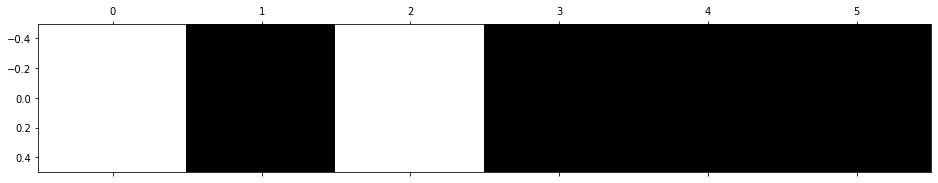

In [63]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [64]:
normalized_VertB.columns.tolist()

[('GR',), ('ROP',), ('WOB',), ('RPM',), ('RHOB',), ('NPHI',)]

In [65]:
normalized_VertB_FS = pd.DataFrame(normalized_VertB_FS,columns=[['ROP', 'RPM', 'RHOB', 'NPHI']])

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

In [67]:
#GridSearchCV?

In [68]:
grid.fit(normalized_VertB_FS, y_VertB)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [69]:
# We can view more detailed results using the cv_results_ variable
#cv_results = pd.DataFrame(grid.cv_results_)
#cv_results.head(48)

In [70]:
print(grid.best_score_)

0.8756744924813743


In [71]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [72]:
# Take the hyperparameter tuned model with RFE to predict DT for VertC.
hypertune_SVR = grid.predict(normalized_VertC[['ROP', 'RPM', 'RHOB', 'NPHI']])

In [73]:
x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR
z2 = hypertune_SVR

p = figure(title='VertC Predicted DT using SVR', plot_width=600, plot_height=400)
r = p.line(x, y, color='green', line_width=0.5,legend_label='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend_label='Pred. DT KNR')
r3 = p.line(x, z2, color='orange', line_width=0.5,legend_label='hypertune_SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'bottom_left'
show(p)

In [74]:
# Calculate MAE so we can compare model performance before and after tuning.
error_VertB_hypertune_model = mean_absolute_error(y_VertC, hypertune_SVR)
print(error_VertB_hypertune_model)
#print(error_VertB_model)

5.680406251279002


<div class="alert alert-success">
    <b>EXERCISE 4</b>:
     <ul>
      <li>See if you can predict the density and porosity logs in a similar manner (RHOB, NPHI). 
      <li>Prepare your data. 
      <li>Create your model using SVR, KNR, etc. 
      <li>Fit the model on 1st well. 
      <li>Predict the model on 2nd, 3rd, etc. 
      <li>Plot the predicted vs. actual results. 
      <li>Perform RFE and hyperparameter tuning. Plot all results. 
      </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>EXERCISE 4 SOLUTION START </b>
</div>

In [76]:
X_VertB = VertB[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']]
y_VertB = VertB['RHOB']

X_VertC = VertC[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']]
y_VertC = VertC['RHOB']

In [77]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])
normalized_VertB = scaler.transform(VertB[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])

scaler = Normalizer().fit(VertC[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])
normalized_VertC = scaler.transform(VertC[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])

In [78]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# We are arbtrarily asking the machine to select the four best features for this model.

from sklearn.feature_selection import RFE

select = RFE(svr,n_features_to_select=4)

In [79]:
select.fit(normalized_VertB, y_VertB)
normalized_VertB_FS = select.transform(normalized_VertB)
print(normalized_VertB.shape)
print(normalized_VertB_FS.shape)

(4919, 6)
(4919, 4)


In [80]:
mask = select.get_support()

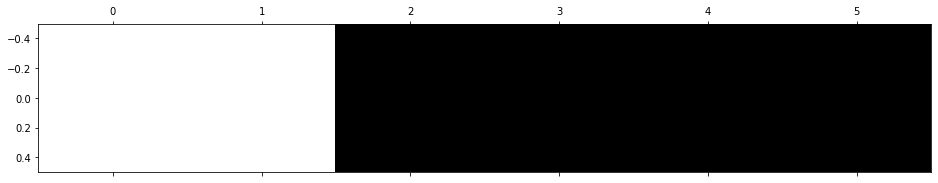

In [81]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [82]:
normalized_VertB.columns.tolist()

[('GR',), ('ROP',), ('WOB',), ('RPM',), ('DT',), ('NPHI',)]

In [83]:
normalized_VertB_FS = pd.DataFrame(normalized_VertB_FS,columns=[['WOB', 'RPM', 'DT', 'NPHI']])

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_VertB_FS, y_VertB)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   56.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [86]:
print(grid.best_score_)

0.2480901020213344


In [87]:
print(grid.best_params_)

{'C': 1232, 'gamma': 1}


In [88]:
# Take the hyperparameter tuned model with RFE to predict RHOB for VertC.
hypertune_SVR = grid.predict(normalized_VertC[['WOB', 'RPM', 'DT', 'NPHI']])

In [89]:
x = VertC['DEPT']
y = VertC['RHOB']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR
z2 = hypertune_SVR

p = figure(title='VertC Predicted RHOB using SVR', plot_width=600, plot_height=400)
r = p.line(x, y, color='green', line_width=0.5,legend_label='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. RHOB SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend_label='Pred. RHOB KNR')
r3 = p.line(x, z2, color='orange', line_width=0.5,legend_label='hypertune_SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'bottom_left'
show(p)

In [90]:
X_VertB = VertB[['WOB', 'RPM', 'DT', 'NPHI']]
y_VertB = VertB['RHOB']

X_VertC = VertC[['WOB', 'RPM', 'DT', 'NPHI']]
y_VertC = VertC['RHOB']

In [91]:
# Can we make this prediction better? Let's try a different regression method in sklearn.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1232, gamma=10)

<div class="alert alert-success">
    <b>EXERCISE 4 SOLUTION END </b>
</div>

In [ ]:
# How does more data affect the result?
# Let's concatenate A,B,C,D and predict E for DT 

In [75]:
VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [76]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [77]:
# Merge A, B, C, D, and predict DT for E.
# And standardize column names.
# My RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA_subset = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB_subset = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC_subset = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD_subset = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE_subset = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA_subset = VertA_subset.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB_subset = VertB_subset.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC_subset = VertC_subset.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD_subset = VertD_subset.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE_subset = VertE_subset.rename(index=str,columns={"GRTO":"GR"})


frames = [VertA_subset,VertB_subset,VertC_subset,VertD_subset]
mergeABCD = pd.concat(frames,ignore_index=True)

In [78]:
mergeABCD.shape

(21898, 8)

In [79]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertABCD = mergeABCD['DT']

X_VertE = VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertE = VertE_subset['DT']

In [80]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])

scaler = Normalizer().fit(VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_subset_X = scaler.transform(VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_subset_X = pd.DataFrame(normalized_VertE_subset_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])

In [81]:
select = RFE(svr,n_features_to_select=4)

In [82]:
select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(21898, 6)
(21898, 4)


In [83]:
mask = select.get_support()
mask

array([False, False,  True,  True,  True,  True])

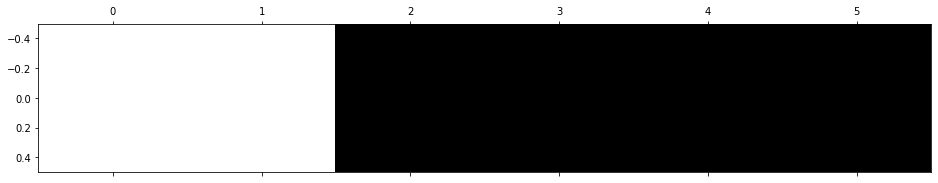

In [84]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [85]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('RHOB',), ('NPHI',)]

In [93]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['RPM','GR','RHOB','NPHI']])

In [87]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 47.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [88]:
print(grid.best_score_)

0.6804552796908412


In [89]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [90]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_subset_X[['RPM','GR','RHOB','NPHI']])

In [91]:
x = VertE['DEPT']
y = VertE['DT']
z = hypertune_SVR

p = figure(title='VertE Predicted DT using SVR', plot_width=800, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend_label='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend_label='Pred. DT SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'DT (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 5</b>:
     <ul>
      <li>Score Pred. DT SVR using mean absolute error.   
</div>

<div class="alert alert-success">
    <b>EXERCISE 5 SOLUTION START </b>
</div>

In [92]:
error = mean_absolute_error(y,z)
error

4.009107742139388

<div class="alert alert-success">
    <b>EXERCISE 5 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 6</b>:
     <ul>
      <li> 
       1. Concatenate A,B,C,D and predict E for RHOB
       <li>
       2. Setup X and y matrices.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict VertE with RFE tuned model.
       <li>
       7. Plot VertE RHOB vs. prediction.
    
       
</div>

<div class="alert alert-success">
    <b>EXERCISE 6 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 6 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 7</b>:
     <ul>
      <li> 
       1. Concatenate Matrices and predict E for PE=PDPE.
       Hint: Locate all the wells that have PDPE data.
       <li>
       2. Setup X and y matrices.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict VertE with RFE tuned model.
       <li>
       7. Plot VertE PE vs. prediction.    
<div>

<div class="alert alert-success">
    <b>EXERCISE 7 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 7 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 8</b>:
     <ul>
      <li> 
       1. Cut VertC log in roughly half.
       <li>
       2. Setup X and y matrices to predict DTSM.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict remainder of VertC with RFE tuned model.
       <li>
       7. Plot VertC DTSM vs. prediction.    
<div>

<div class="alert alert-success">
    <b>EXERCISE 8 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 8 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 9</b>:
     <ul>
      <li> 
       Lets pretend to be geologists unless you are a real one (separate assignment).
       <li>
       1. Cut out the section of every well between 5000 and 6000 feet.
       <li>
       2. Concatenate 4 of the wells and use them to predict DT for the 5th well.
       <li>
       3. Hyperparameter tune.
          
<div>

<div class="alert alert-success">
    <b>EXERCISE 9 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 9 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 10</b>:
     <ul>
      <li> 
       Lets pretend to be geologists unless you are a real one (separate assignment).
       <li>
       1. Cut out the section of every well between 5000 and 6000 feet.
       <li>
       2. Concatenate 4 of the wells and use them to predict RHOB for the 5th well.
       <li>
       3. Hyperparameter tune.    
<div>

<div class="alert alert-success">
    <b>EXERCISE 10 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 10 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 11</b>:
     <ul>
      <li> 
       Lets pretend to be geologists unless you are a real one (separate assignment).
       <li>
       1. Cut out the section of every well between 5000 and 6000 feet.
       <li>
       2. Concatenate 4 of the wells and use them to predict NPHI for the 5th well.
       <li>
       3. Hyperparameter tune.
           
<div>

<div class="alert alert-success">
    <b>EXERCISE 11 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 11 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 12</b>:
     <ul>
      <li> 
       Take a look at decision tree regression https://scikit-learn.org/stable/modules/tree.html#regression
       <li>
           1. Concatenate A,B,C,D and predict E for DT
       <li>
       2. Setup X and y matrices.
       <li>
       3. Perform RFE.
       <li>
       4. Perform hyperparameter tuning.
       <li>
       5. Predict VertE with RFE tuned model.
       <li>
       6. Plot VertE DT actual vs. prediction.
<div>

<div class="alert alert-success">
    <b>EXERCISE 12 SOLUTION START </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 12 SOLUTION END </b>
</div>